## Fitting Logistic Regression Model

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [68]:
X = pd.read_csv('Data/Crash_X.csv')
y = pd.read_csv('Data/Crash_y.csv')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
clf = LogisticRegression(C=10)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Looks like [this stack exchange](https://stats.stackexchange.com/questions/221622/interpreting-multinomial-logistic-regression-in-scikit-learn) will help me interpret this model.

## Classification Report

In [71]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93     14332
          1       0.82      0.61      0.70      3913

avg / total       0.88      0.89      0.88     18245



## Confusion Matrix

In [72]:
confusion_matrix(y_test, y_pred).T

array([[13810,  1515],
       [  522,  2398]])

## ROC Curve

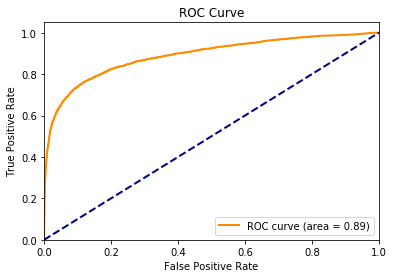

In [73]:
y_score = clf.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
coefficients = pd.DataFrame(clf.coef_.flatten(), index=X.columns)

In [75]:
# Allows for inspection of Logistic Regression Coefficients
coefficients

,0
DRIVER1AGE,0.162304
DRIVER2AGE,-0.394169
NOATYPEINJ,0.115975
NOBTYPEINJ,0.172921
NOCTYPEINJ,0.286384
NUMOFINJ,0.341659
NUMOFOCCUP,-3.042894
NUMOFUNINJ,3.083760
NUMOFVEHIC,0.129415
SPEEDLIMIT,-0.000438
